## Assumptions, $H_A$, & what I (think I) know

1. Cost per sqft and waterfront may have the biggest influence on sale price
2. Sale price is related to the sale price of neighboring homes (zip?)
3. Homes renovated more recently will sell for higher than their neighbors who have not renovated

## Questions about problem/dataset:
1. Count of houses per zipcode
2. Average sale by zipcode
    * Is there a correlation between price and zip?
3. Cost per living sqft and lot sqft by zipcode
4. Mean cost by built year, reno year
5. How to account for waterfront
6. What is grading? do we need to research this?
7. How does recent renovation impact sale price


## Questions about approach
* should all nondate features be float if not boolean?

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import datetime

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head(150)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Column Names and descriptions 
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
    * **GRADE** Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)
    * **BUILDING GRADE**
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

    * 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

    * 4 Generally older, low quality construction. Does not meet code.

    * 5 Low construction costs and workmanship. Small, simple design.

    * 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

    * 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

    * 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

    * 9 Better architectural design with extra interior and exterior design and quality.

    * 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

    * 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

    * 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

    * 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [7]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [9]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [10]:
df.zipcode.nunique()

70

## Potential cleaning:
* sqft_basement    
    * object n, has a '?'
    * int or boolean
* convert floats to int?
* why are some waterfront as nan?

In [11]:
df = df.replace('?',0)

### Deaing with null vals

In [12]:
df = df.replace('?',0)
df.yr_renovated = df.yr_renovated.replace(0, np.nan)
#df.waterfront = df.waterfront.replace(np.nan, 1)
#df = df.replace(np.nan, 0)
df.loc[:, df.columns != 'date'] = df.loc[:,df.columns != 'date'].astype('float')
df['date'] = pd.to_datetime(df['date'])
#df.sqft_basement = df.sqft_basement.astype('float')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null float64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_built         21597 non-null float64
yr_renovated     744 non-null float64
zipcode          21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: datetime64[ns](1), float64(20)
memory 

In [13]:
nullviews = df[df['view'].isnull()]
nullviews.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,57.000000,0.0,63.000000,63.000000,63.000000,63.000000,63.000000,1.0,63.000000,63.000000,63.000000,63.000000,63.000000
mean,3.938991e+09,6.219582e+05,3.428571,2.154762,2249.174603,18111.571429,1.484127,0.017544,NaN,3.444444,7.825397,1802.031746,447.142857,1970.111111,1995.0,98082.222222,47.530452,-122.225619,2096.126984,15220.682540
std,2.811234e+09,6.809271e+05,0.892880,0.896261,1117.119720,51631.810542,0.499744,0.132453,NaN,0.616383,1.350504,839.149761,564.196341,29.317016,NaN,55.949702,0.144512,0.137397,719.023004,33298.112833
min,1.045408e+08,1.440000e+05,2.000000,1.000000,890.000000,2159.000000,1.000000,0.000000,NaN,3.000000,6.000000,790.000000,0.000000,1905.000000,1995.0,98001.000000,47.207800,-122.408000,900.000000,1288.000000
25%,1.845600e+09,3.224750e+05,3.000000,1.750000,1445.000000,5766.500000,1.000000,0.000000,NaN,3.000000,7.000000,1195.000000,0.000000,1950.000000,1995.0,98035.000000,47.397700,-122.328500,1530.000000,5943.000000
50%,3.448900e+09,4.800000e+05,3.000000,2.250000,2120.000000,7725.000000,1.500000,0.000000,NaN,3.000000,7.000000,1580.000000,270.000000,1975.000000,1995.0,98072.000000,47.537800,-122.266000,1980.000000,7700.000000
75%,6.021500e+09,6.790000e+05,4.000000,2.500000,2545.000000,10235.500000,2.000000,0.000000,NaN,4.000000,9.000000,2470.000000,815.000000,1994.000000,1995.0,98125.000000,47.628000,-122.140500,2500.000000,9665.000000
max,9.468200e+09,5.300000e+06,6.000000,6.000000,7390.000000,360241.000000,2.500000,1.000000,NaN,5.000000,12.000000,5000.000000,2390.000000,2014.000000,1995.0,98199.000000,47.776400,-121.850000,4470.000000,209959.000000


In [14]:
notnullviews = df[df['view'].notnull()]
notnullviews.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,19164.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,743.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007566,0.233863,3.409724,7.657425,1788.557537,285.244311,1971.002275,1995.930013,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.086657,0.765686,0.650654,1.172643,827.745641,439.334095,29.376044,15.610417,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,2007.500000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
nullreno = df[df['yr_renovated'].isnull()]
nullreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,1180.0,0.0,1955.0,NaN,98178.0,47.5112,-122.257,1340.0,5650.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,NaN,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0
5,7.237550e+09,2014-05-12,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,NaN,98053.0,47.6561,-122.005,4760.0,101930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,1530.0,1509.0
21593,6.600060e+09,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,NaN,98146.0,47.5107,-122.362,1830.0,7200.0
21594,1.523300e+09,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,NaN,98144.0,47.5944,-122.299,1020.0,2007.0
21595,2.913101e+08,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,1600.0,0.0,2004.0,NaN,98027.0,47.5345,-122.069,1410.0,1287.0


In [16]:
notnullreno = df[df['yr_renovated'].notnull()]
notnullreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
35,9.547205e+09,2014-06-13,696000.0,3.0,2.50,2300.0,3060.0,1.5,0.0,0.0,3.0,8.0,1510.0,790.0,1930.0,2002.0,98115.0,47.6827,-122.310,1590.0,3264.0
95,1.483301e+09,2014-09-08,905000.0,4.0,2.50,3300.0,10250.0,1.0,0.0,0.0,3.0,7.0,2390.0,910.0,1946.0,1991.0,98040.0,47.5873,-122.249,1950.0,6045.0
103,2.450000e+09,2014-10-07,1090000.0,3.0,2.50,2920.0,8113.0,2.0,0.0,0.0,3.0,8.0,2920.0,0.0,1950.0,2010.0,98004.0,47.5814,-122.196,2370.0,8113.0
125,4.389201e+09,2015-03-02,1450000.0,4.0,2.75,2750.0,17789.0,1.5,0.0,0.0,3.0,8.0,1980.0,770.0,1914.0,1992.0,98004.0,47.6141,-122.212,3060.0,11275.0
158,8.029200e+09,2014-11-13,247000.0,3.0,2.00,1270.0,7198.0,1.5,0.0,0.0,3.0,7.0,1270.0,0.0,1916.0,2013.0,98022.0,47.2086,-121.996,1160.0,7198.0
209,6.300001e+09,2014-07-17,464000.0,6.0,3.00,2300.0,3404.0,2.0,0.0,0.0,3.0,7.0,1600.0,700.0,1920.0,1994.0,98133.0,47.7067,-122.343,1560.0,1312.0
216,4.610020e+07,2015-02-21,1510000.0,5.0,3.00,3300.0,33474.0,1.0,NaN,3.0,3.0,9.0,1870.0,1430.0,1957.0,1991.0,98040.0,47.5673,-122.210,3836.0,20953.0
230,8.096000e+09,2015-04-13,655000.0,2.0,1.75,1450.0,15798.0,2.0,1.0,4.0,3.0,7.0,1230.0,220.0,1915.0,1978.0,98166.0,47.4497,-122.375,2030.0,13193.0
237,7.228501e+09,2015-03-20,410000.0,4.0,1.00,1970.0,4740.0,1.5,0.0,0.0,3.0,7.0,1670.0,300.0,1904.0,2005.0,98122.0,47.6136,-122.303,1510.0,4740.0


In [17]:
notreno = notnullreno[notnullreno['yr_renovated'] == 0]
notreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Potential Features to engineer
* price per sqft
* years since renovation
* year of sale (from date)

In [18]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['price_per_sqftliving'] = df.price / df.sqft_living
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,price_per_sqftliving
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,1180.0,0.0,1955.0,NaN,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10,188.050847
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12,209.338521
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,2015,2,233.766234
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,NaN,98136.0,47.5208,-122.393,1360.0,5000.0,2014,12,308.163265
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0,2015,2,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,1530.0,1509.0,2014,5,235.294118
21593,6.600060e+09,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,NaN,98146.0,47.5107,-122.362,1830.0,7200.0,2015,2,173.160173
21594,1.523300e+09,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,NaN,98144.0,47.5944,-122.299,1020.0,2007.0,2014,6,394.216667
21595,2.913101e+08,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,1600.0,0.0,2004.0,NaN,98027.0,47.5345,-122.069,1410.0,1287.0,2015,1,250.000000


In [19]:
df['price_per_sqftliving'] = df.price / df.sqft_living
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,price_per_sqftliving
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,1180.0,0.0,1955.0,NaN,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10,188.050847
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12,209.338521
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,2015,2,233.766234
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,NaN,98136.0,47.5208,-122.393,1360.0,5000.0,2014,12,308.163265
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0,2015,2,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,1530.0,1509.0,2014,5,235.294118
21593,6.600060e+09,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,NaN,98146.0,47.5107,-122.362,1830.0,7200.0,2015,2,173.160173
21594,1.523300e+09,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,NaN,98144.0,47.5944,-122.299,1020.0,2007.0,2014,6,394.216667
21595,2.913101e+08,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,1600.0,0.0,2004.0,NaN,98027.0,47.5345,-122.069,1410.0,1287.0,2015,1,250.000000


In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,price_per_sqftliving
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,744.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,1995.928763,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969,264.143368
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,15.599946,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061,110.000061
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,87.588235
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,182.291667
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000,244.644550
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,2007.250000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,318.333333
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,810.138889


In [21]:
df['yrs_since_reno'] = df.yr_renovated - df.yr_built
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,price_per_sqftliving,yrs_since_reno
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3.0,7.0,1180.0,0.0,1955.0,NaN,98178.0,47.5112,-122.257,1340.0,5650.0,2014,10,188.050847,NaN
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014,12,209.338521,40.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,2015,2,233.766234,NaN
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,NaN,98136.0,47.5208,-122.393,1360.0,5000.0,2014,12,308.163265,NaN
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0,2015,2,303.571429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.630000e+08,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,NaN,98103.0,47.6993,-122.346,1530.0,1509.0,2014,5,235.294118,NaN
21593,6.600060e+09,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,NaN,98146.0,47.5107,-122.362,1830.0,7200.0,2015,2,173.160173,NaN
21594,1.523300e+09,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,NaN,98144.0,47.5944,-122.299,1020.0,2007.0,2014,6,394.216667,NaN
21595,2.913101e+08,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3.0,8.0,1600.0,0.0,2004.0,NaN,98027.0,47.5345,-122.069,1410.0,1287.0,2015,1,250.000000,NaN


In [23]:
fastcorr = df[['price','grade','bedrooms','bathrooms','sqft_living','waterfront','yr_built','sale_year','sale_month','yrs_since_reno']]

In [187]:
df.yr_renovated = df.yr_renovated.replace(np.nan, 0)
df.waterfront = df.waterfront.replace(np.nan, 1)
df = df.replace(np.nan, 0)
df.loc[:, df.columns != 'date'] = df.loc[:,df.columns != 'date'].astype('float')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id                      21597 non-null float64
date                    21597 non-null datetime64[ns]
price                   21597 non-null float64
bedrooms                21597 non-null float64
bathrooms               21597 non-null float64
sqft_living             21597 non-null float64
sqft_lot                21597 non-null float64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null float64
grade                   21597 non-null float64
sqft_above              21597 non-null float64
sqft_basement           21597 non-null float64
yr_built                21597 non-null float64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null float64
lat                     21597 non-null float64
long                    21597 non-null

In [205]:
df.head(250)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,price_per_sqftliving,yrs_since_reno
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014.0,10.0,188.050847,0.0
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014.0,12.0,209.338521,40.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015.0,2.0,233.766234,0.0
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,2014.0,12.0,308.163265,0.0
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,2015.0,2.0,303.571429,0.0
5,7.237550e+09,2014-05-12,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,2014.0,5.0,226.937269,0.0
6,1.321400e+09,2014-06-27,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0,2014.0,6.0,150.145773,0.0
7,2.008000e+09,2015-01-15,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,2015.0,1.0,275.330189,0.0
8,2.414600e+09,2015-04-15,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,2015.0,4.0,128.932584,0.0
9,3.793500e+09,2015-03-12,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,2015.0,3.0,170.899471,0.0


In [188]:
# df.hist(bins=50, figsize=(20,15))
# plt.show()

In [189]:
wf = df[df['waterfront'] != 0]
#wf #only 146 are '1'??

In [190]:
# wf.hist(bins=50, figsize=(20,15))
# plt.show()

In [191]:
# #plot on map by lat&lon with value (tst-train-split)
# x = df.long
# y = df.lat
# fig = plt.figure(figsize=(15,15))
# plt.scatter(x,y,s=1.5,alpha=0.1)#,c='price',cmap=plt.get_cmap("jet"), colorbar=True)
# #plt.legend()

In [192]:
# #plot on map by lat&lon with value (tst-train-split)

# x = wf.long
# y = wf.lat
# fig = plt.figure(figsize=(15,15))
# plt.scatter(x,y,s=15,alpha=1)#,c='price',cmap=plt.get_cmap("jet"), colorbar=True)
# #plt.legend()

In [203]:
df.sale_year.unique()

array([2014., 2015.])

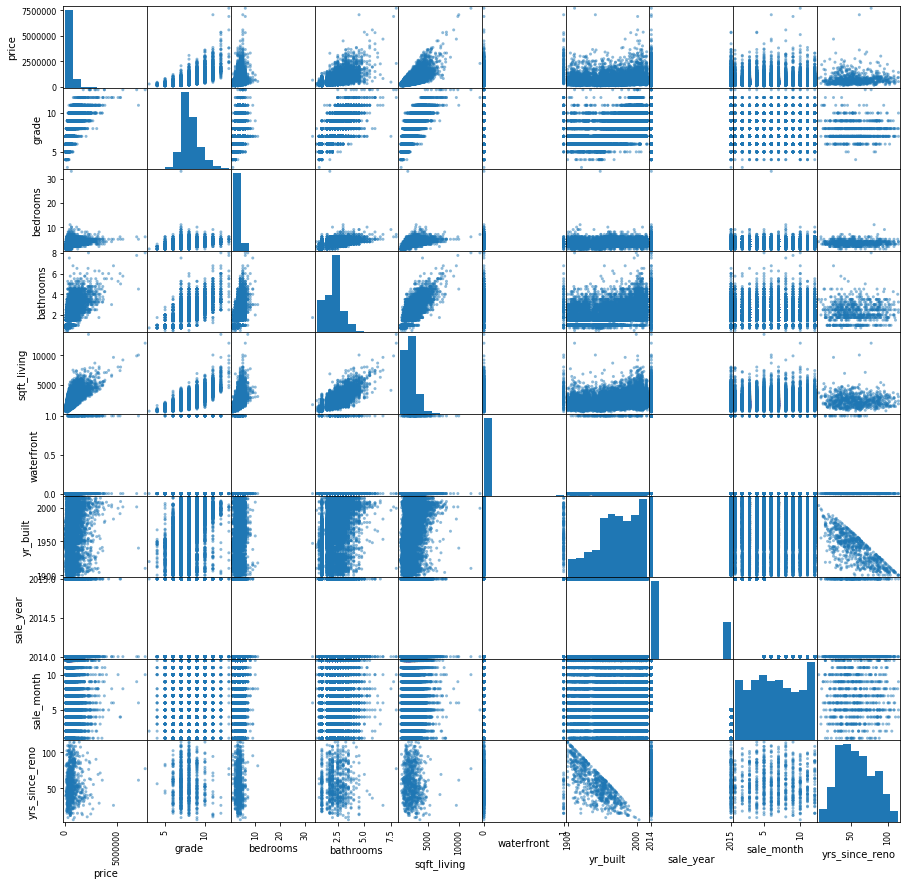

In [24]:
data_pred = df[[]]
data_pred.head()

pd.plotting.scatter_matrix(fastcorr,figsize  = [15, 15]);
plt.show()